# Cleaning web-scraped data

**Priority**
- Clean up reviews
- Convert SalePrice to floats
- Bin SalePrice for our target variable
- Prepare for modeling

**Secondary**
- Clean the rest of data
- Turn Mieage into floats
- Split mpg to city and highway

In [131]:
# imports
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import numpy as np
from tqdm.notebook import tqdm
import re
import math

In [2]:
df = pd.read_csv('data/carinfoV2.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

**Data is dirty, time to clean**

In [4]:
df

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.","$29,000"
1,[],[],Front-wheel Drive,Electric,Electric,1-Speed Automatic,Electric,"62,439 mi.","$18,989"
2,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.","$55,975"
3,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.","$38,900"
4,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.","$22,125"
...,...,...,...,...,...,...,...,...,...
9217,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.","$25,500"
9218,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.","$35,590"
9219,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.","$24,000"
9220,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.","$71,077"


**looking through each column and getting rid of blanks**
- manually looking up value counts and checking which character represents a 'blank'

In [5]:
test = df[df['Model'] != '[]']

In [6]:
test2 = test[test['Reviews'] != '[]']

In [7]:
test2['DriveTrain'].value_counts()

 Front-wheel Drive     3661
 All-wheel Drive       1815
 Four-wheel Drive      1634
 Rear-wheel Drive      1414
 FWD                     32
 –                       32
 AWD                      6
 RWD                      3
 4WD                      1
Name: DriveTrain, dtype: int64

In [8]:
test3 = test2[test2['DriveTrain'] != ' – ']

In [9]:
test4 = test3[test3['MPG'] != ' – ']

In [10]:
test5 = test4[test4['FuelType'] != '– ']

In [11]:
test6 = test5[test5['Transmission'] != '–']

In [12]:
test7 = test6[test6['Engine'] != '–']

In [13]:
test7['Reviews'].value_counts()

['After 9800 miles and being towed 5 times, i would not recommend this truck for reliability for anything. I contacted Ford after being towed the 3rd time, and they said they couldn’t help me to resolve the issue, that i needed to take it for service. 3 fuel pumps later, I traded it for a chevy… couldn’t be happier. Nothing worse than be stranded on 2 lane highways between Oklahoma and Montana and feeling hopeless with little cell phone service. Don’t buy, they don’t stand behind their product ', 'Love my2019 f-150  sport truck Nice power. For a 2.7. Twin turbo. This truck will move  nice gas mileage I get 20 city. About 24 high way.  It Drives.nice  handles well. For a big truck. No wonder it’s the  Best selling truck the last 40 years   ', "Best truck out there! Plenty of room for the grandkids seats and 4 people. Also, plenty of room in the bed for working/hauling materials. And all of this can happen at the same time. All of the HP you'll need for anything. Recently hauled a load o

In [14]:
len(test) - len(test7)

295

lost 295 rows for blanks... so far

**Re-naming**

In [15]:
data = test7

**Only ~1899 unique reviews, okay for this project**
- Would like to grab more unique reviews in the future

In [16]:
data  = data.reset_index(drop=True)

In [17]:
data

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.","$29,000"
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.","$55,975"
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.","$38,900"
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.","$22,125"
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.","$23,946"
...,...,...,...,...,...,...,...,...,...
8476,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.","$25,500"
8477,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.","$35,590"
8478,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.","$24,000"
8479,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.","$71,077"


In [18]:
data['Reviews'].value_counts()

['After 9800 miles and being towed 5 times, i would not recommend this truck for reliability for anything. I contacted Ford after being towed the 3rd time, and they said they couldn’t help me to resolve the issue, that i needed to take it for service. 3 fuel pumps later, I traded it for a chevy… couldn’t be happier. Nothing worse than be stranded on 2 lane highways between Oklahoma and Montana and feeling hopeless with little cell phone service. Don’t buy, they don’t stand behind their product ', 'Love my2019 f-150  sport truck Nice power. For a 2.7. Twin turbo. This truck will move  nice gas mileage I get 20 city. About 24 high way.  It Drives.nice  handles well. For a big truck. No wonder it’s the  Best selling truck the last 40 years   ', "Best truck out there! Plenty of room for the grandkids seats and 4 people. Also, plenty of room in the bed for working/hauling materials. And all of this can happen at the same time. All of the HP you'll need for anything. Recently hauled a load o

**Converting from string to float**
- getting numbers
- turning number string to float

In [19]:
data['SalePrice'] = data['SalePrice'].str.translate({ord(i): None for i in '$,'})

In [20]:
data

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946
...,...,...,...,...,...,...,...,...,...
8476,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.",25500
8477,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.",35590
8478,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.",24000
8479,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.",71077


In [21]:
data = data.loc[data['SalePrice'] != 'Not Priced']

In [22]:
data['SalePrice'] = data['SalePrice'].astype(float)

<ipython-input-22-50854e4490e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SalePrice'] = data['SalePrice'].astype(float)


In [23]:
data

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0
...,...,...,...,...,...,...,...,...,...
8476,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.",25500.0
8477,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.",35590.0
8478,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.",24000.0
8479,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.",71077.0


**Binning SalePrice for target variable**
- Seems to have good distribubtion of prices
- Use qcut to bin, use as starting point

In [24]:
data['SalePrice'].describe()

count      8475.000000
mean      38280.058997
std       22057.867345
min        2500.000000
25%       25376.500000
50%       34598.000000
75%       44988.000000
max      435500.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

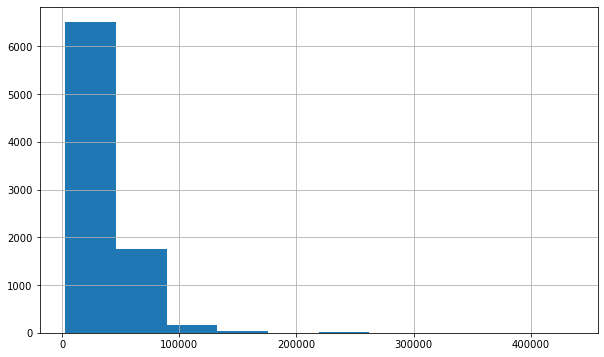

In [25]:
data['SalePrice'].hist(figsize=(10,6))

In [26]:
pd.qcut(data['SalePrice'], q=5).unique()

[(23952.2, 30855.8], (47902.6, 435500.0], (38590.0, 47902.6], (2499.999, 23952.2], (30855.8, 38590.0]]
Categories (5, interval[float64]): [(2499.999, 23952.2] < (23952.2, 30855.8] < (30855.8, 38590.0] < (38590.0, 47902.6] < (47902.6, 435500.0]]

**Outliers seem to have little effect on binning**

In [27]:
pd.qcut(data.loc[data['SalePrice'] <= 150000]['SalePrice'], q=5).unique()

[(23910.0, 30731.6], (47625.2, 149999.0], (38500.0, 47625.2], (2499.999, 23910.0], (30731.6, 38500.0]]
Categories (5, interval[float64]): [(2499.999, 23910.0] < (23910.0, 30731.6] < (30731.6, 38500.0] < (38500.0, 47625.2] < (47625.2, 149999.0]]

**Bins to be used**
- Cheap 0-22k
- Below Average 22k-30k
- Average 30k-38k
- Above Average 38k-50k
- Expensive 50k+


This is for the cars in this dataset, Google says average price in AL is 33k. Binning is okay for general idea.

In [28]:
bins = [
    (data['SalePrice'] <= 22000),
    (data['SalePrice'] > 22000) & (data['SalePrice'] <= 30000),
    (data['SalePrice'] > 30000) & (data['SalePrice'] <= 38000),
    (data['SalePrice'] > 38000) & (data['SalePrice'] <= 50000),
    (data['SalePrice'] > 50000)
    ]

# create a list of the values we want to assign for each condition
price_cat = ['Cheap', 'BelowAverage', 'Average', 'AboveAverage', 'Expensive']

# create a new column and use np.select to assign values to it using our lists as arguments
data['PriceCategory'] = np.select(bins, price_cat)

<ipython-input-28-bd3203b329c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceCategory'] = np.select(bins, price_cat)


In [29]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,BelowAverage
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,AboveAverage
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,BelowAverage
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,BelowAverage


**Bins seem evenly distributed**

In [30]:
data['PriceCategory'].value_counts()

AboveAverage    2025
BelowAverage    1942
Average         1710
Expensive       1417
Cheap           1381
Name: PriceCategory, dtype: int64

**Grabbing a review**
- attempt to clean it
- create new column with clean reviews

In [31]:
string = df['Reviews'][2]


In [32]:
string

'["Stranded today. Could not get to work. Something was left on while I charged the battery. Not enough energy to drive 5 miles to work. Oh and in the winter don\'t dare turn on the heater. Your energy will deplete in a heart beat. Same goes for air conditioning. And if it\'s below 39 degrees, which is normal for Central Oregon winters, you will never get a full charge. DO NOT BUY. Oh and buy the way this car was 4 years old when I bought it, but it only had 23,000 miles and I have had these issues ever since I bought it.", \'Bought used, cant really tell by the looks of it, 35,400 miles.\\nI commute daily in it, charge it nightly and it’s ready to go in the morning, nice and warm.\\nCar is pretty much a regular Golf other than the eMotor and the battery.\\nHandles real nice due to very low center of gravity.\\nSurprisingly good acceleration.\\n3 modes of power, normal, eco and eco+.\\nRegenerative braking dumps power back into battery,\\nIf you drive carefully and leave plenty of room

In [33]:
string = re.sub(r'\\n', '', string)
string = re.sub(r'\\r', '', string)
string = string.replace('[', '')
string = string.replace(']', '')
string = string.replace('"', '')

In [34]:
string

"Stranded today. Could not get to work. Something was left on while I charged the battery. Not enough energy to drive 5 miles to work. Oh and in the winter don't dare turn on the heater. Your energy will deplete in a heart beat. Same goes for air conditioning. And if it's below 39 degrees, which is normal for Central Oregon winters, you will never get a full charge. DO NOT BUY. Oh and buy the way this car was 4 years old when I bought it, but it only had 23,000 miles and I have had these issues ever since I bought it., 'Bought used, cant really tell by the looks of it, 35,400 miles.I commute daily in it, charge it nightly and it’s ready to go in the morning, nice and warm.Car is pretty much a regular Golf other than the eMotor and the battery.Handles real nice due to very low center of gravity.Surprisingly good acceleration.3 modes of power, normal, eco and eco+.Regenerative braking dumps power back into battery,If you drive carefully and leave plenty of room between your car and the o

In [35]:
def review_cleaner(rev):
    clean = re.sub(r'\\n', '', rev)
    clean = re.sub(r'\\r', '', clean)
    clean = clean.replace('[', '')
    clean = clean.replace(']', '')
    clean = clean.replace('"', '')
    clean = clean.replace("'", "")
    return clean

In [36]:
data['Reviews'][45]

"['it was nice joyable but 2008 is better and it has a spear tire and was very nice i rate it 8/10 that better then nothing.', '2008 model was much better than 2013 and what idiot eng placed a spare tire in the floor?\\nWhen you have big family you need space for storage on the long trips.\\nSo Ac issues, sliding door issues, EGR issues VSC issues', 'Amazing van.  Love it, love it, love it.  Reliable Honda Odyssey.  Great for family vacations.  The kids, dogs, family, and friends enjoy riding in the van.']"

In [37]:
review_cleaner(data['Reviews'][45])

'it was nice joyable but 2008 is better and it has a spear tire and was very nice i rate it 8/10 that better then nothing., 2008 model was much better than 2013 and what idiot eng placed a spare tire in the floor?When you have big family you need space for storage on the long trips.So Ac issues, sliding door issues, EGR issues VSC issues, Amazing van.  Love it, love it, love it.  Reliable Honda Odyssey.  Great for family vacations.  The kids, dogs, family, and friends enjoy riding in the van.'

In [38]:
data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))

<ipython-input-38-cfc12aaf38a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))


In [39]:
data['CleanReviews'][8]

'I’ve wanted a duramax for a long time but finding the right one wasn’t easy! I am in LOVE with my new purchase. Can’t wait to hook my horse trailer to it!, This truck has everything...... Its by far the nicest pickup I have ever driven and owned !!!!! I would recommend this to all my friends !, After haven driving several new heavy duty diesel pickups I decided to go with the Chevrolet. The L5P engine is powerful, and Of course they’re all powerful these days. But this truck is fast, faster than my most of my friends trucks that have aftermarket tunes. Faster than my neighbors tuned 6.7 ford. 2019 was the last year of the real Allison transmission 6 speed so that’s a plus also. The new trucks have a GM 10 speed. The truck seems to be rock solid so far. No real issues yet. Hauled number ours heavy trailers and haven’t had an issue. Truck is my daily driver and rides great. It rides just like a half ton.'

**It works :)**

In [40]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable..."
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO..."
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...


In [41]:
data['CleanReviews'].value_counts()

After 9800 miles and being towed 5 times, i would not recommend this truck for reliability for anything. I contacted Ford after being towed the 3rd time, and they said they couldn’t help me to resolve the issue, that i needed to take it for service. 3 fuel pumps later, I traded it for a chevy… couldn’t be happier. Nothing worse than be stranded on 2 lane highways between Oklahoma and Montana and feeling hopeless with little cell phone service. Don’t buy, they don’t stand behind their product , Love my2019 f-150  sport truck Nice power. For a 2.7. Twin turbo. This truck will move  nice gas mileage I get 20 city. About 24 high way.  It Drives.nice  handles well. For a big truck. No wonder it’s the  Best selling truck the last 40 years   , Best truck out there! Plenty of room for the grandkids seats and 4 people. Also, plenty of room in the bed for working/hauling materials. And all of this can happen at the same time. All of the HP youll need for anything. Recently hauled a load of heavy

In [42]:
len(data)

8475

**Save as csv**
- This is so we can model in a different notebook

In [43]:
#data.to_csv('cleanMVP.csv')

**Secondary**
- clean the rest of the data

In [44]:
data = data.drop(columns='Reviews')

In [45]:
data

,Model,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews
0,['2020 Toyota RAV4 LE'],Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...
1,['2016 Volkswagen e-Golf SE'],Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...
2,['2020 Lincoln Aviator Reserve RWD'],Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable..."
3,['2021 Toyota Tacoma TRD Off Road'],Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO..."
4,['2020 Nissan Altima 2.5 S'],Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...
...,...,...,...,...,...,...,...,...,...,...
8476,['2022 BMW X5 xDrive40i'],Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.",25500.0,BelowAverage,Only had the X5 for 4 weeks now but so far it ...
8477,['2019 Toyota Tacoma TRD Off Road'],All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.",35590.0,Average,When I bought my 2020 Tacoma V6 (3.5L) 4x4 in ...
8478,['2015 INFINITI QX80 Base'],Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.",24000.0,BelowAverage,Everything is great except the rear view camer...
8479,['2020 Toyota Tundra SR5'],Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.",71077.0,Expensive,I have owned smaller SUV\s and Trucks for over...


In [46]:
data['Model'] = data['Model'].apply(lambda x: review_cleaner(x))

In [47]:
data['Model'][0].split()[2]

'RAV4'

**Get year model and make in seperate cols**

In [48]:
data['Year'] = data['Model'].apply(lambda x: x.split()[0])

In [49]:
data['Make'] = data['Model'].apply(lambda x: x.split()[1])

In [50]:
data['Car_Model'] = data['Model'].apply(lambda x: x.split()[2])

In [51]:
data.head()

,Model,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model
0,2020 Toyota RAV4 LE,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...,2020,Toyota,RAV4
1,2016 Volkswagen e-Golf SE,Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016,Volkswagen,e-Golf
2,2020 Lincoln Aviator Reserve RWD,Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable...",2020,Lincoln,Aviator
3,2021 Toyota Tacoma TRD Off Road,Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021,Toyota,Tacoma
4,2020 Nissan Altima 2.5 S,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...,2020,Nissan,Altima


**turn mileage and year into floats**

In [52]:
data['Mileage'] = data['Mileage'].str.translate({ord(i): None for i in ',mi. '})

In [53]:
data = data[data['Mileage'] != '–']

In [54]:
data = data.reset_index(drop=True)

In [55]:
data['Mileage'] = data['Mileage'].astype(float)

In [56]:
data['Year'] = data['Year'].astype(float)

**simpify cols**
- DriveTrain - AWD, FWD, RWD
- FuelType - GAS, DIS, ELE
- Engine - size and cylinders
- Transmission - AUTO, MANUEL, ELE
- MPG - City, Highway

In [57]:
data['DriveTrain'].value_counts()

 Front-wheel Drive     3640
 All-wheel Drive       1795
 Four-wheel Drive      1609
 Rear-wheel Drive      1389
 FWD                     31
 AWD                      6
 RWD                      3
 4WD                      1
Name: DriveTrain, dtype: int64

In [58]:
driveT = {' Front-wheel Drive ' : 'FWD',
         ' All-wheel Drive ' : 'AWD',
         ' Four-wheel Drive ' : 'FWD',
         ' Rear-wheel Drive ' : 'RWD',
         ' 4WD ' : 'FWD',
         ' FWD ' : 'FWD',
         ' AWD ' : 'AWD',
         ' RWD ' : 'RWD'}

In [59]:
data.replace({"DriveTrain": driveT})['DriveTrain'].value_counts()

FWD    5281
AWD    1801
RWD    1392
Name: DriveTrain, dtype: int64

In [60]:
data.replace({'DriveTrain': driveT},inplace=True)

In [61]:
data['MPG'].value_counts()

19–26        329
Gasoline     328
20–27        240
19–24        214
18–25        163
            ... 
30–28          1
14–24          1
18–29          1
32–39          1
137–111        1
Name: MPG, Length: 300, dtype: int64

In [62]:
data['MPG'][0].split('–')[1]

'35'

**Using weird number to be able to find and then change to an average when mpg is a float**

In [63]:
gasDict = {'Diesel ' : '456–654',
          'Gasoline ' : '789–987',
          'E85 Flex Fuel ' : '789–987',
          'Hybrid ' : '789–987',
          'Electric ' : '1234–4321'}

In [64]:
data.replace({"MPG": gasDict}, inplace=True)

In [65]:
data

,Model,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model
0,2020 Toyota RAV4 LE,FWD,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,53200.0,29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,RAV4
1,2016 Volkswagen e-Golf SE,RWD,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,e-Golf
2,2020 Lincoln Aviator Reserve RWD,FWD,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,17854.0,38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,Aviator
3,2021 Toyota Tacoma TRD Off Road,FWD,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,60907.0,22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,Toyota,Tacoma
4,2020 Nissan Altima 2.5 S,FWD,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,41614.0,23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,Nissan,Altima
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8469,2022 BMW X5 xDrive40i,FWD,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,78378.0,25500.0,BelowAverage,Only had the X5 for 4 weeks now but so far it ...,2022.0,BMW,X5
8470,2019 Toyota Tacoma TRD Off Road,AWD,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,30909.0,35590.0,Average,When I bought my 2020 Tacoma V6 (3.5L) 4x4 in ...,2019.0,Toyota,Tacoma
8471,2015 INFINITI QX80 Base,FWD,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,30186.0,24000.0,BelowAverage,Everything is great except the rear view camer...,2015.0,INFINITI,QX80
8472,2020 Toyota Tundra SR5,FWD,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,22309.0,71077.0,Expensive,I have owned smaller SUV\s and Trucks for over...,2020.0,Toyota,Tundra


**will only grab city mpg, some cars don't have highway mpg**

In [66]:
data['MPG'][299]

'22'

In [67]:
data['MPG']  = data['MPG'].apply(lambda x: float(x.split('–')[0]))

In [68]:
data = data.drop(columns=['Model'])

In [69]:
data['FuelType'].value_counts().index

Index(['Gasoline ', 'Diesel ', 'E85 Flex Fuel ', 'Hybrid ', 'Electric ',
       'Gasoline Fuel ', 'Gasoline/Mild Electric Hybrid '],
      dtype='object')

In [70]:
fueldict = {'Gasoline ' : 'Gasoline',
           'Diesel ' : 'Diesel',
           'E85 Flex Fuel ': 'Gasoline',
           'Hybrid ' : 'Hybird',
           'Electric ' : 'Electric',
           'Gasoline Fuel ' : 'Gasoline',
           'Gasoline/Mild Electric Hybrid ' : 'Hybird'}

In [71]:
data.replace({"FuelType": fueldict}, inplace=True)

In [72]:
data['FuelType'].value_counts()

Gasoline    8079
Diesel       170
Hybird       143
Electric      82
Name: FuelType, dtype: int64

In [73]:
data

,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model
0,FWD,27.0,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,53200.0,29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,RAV4
1,RWD,18.0,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,e-Golf
2,FWD,18.0,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,17854.0,38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,Aviator
3,FWD,28.0,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,60907.0,22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,Toyota,Tacoma
4,FWD,24.0,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,41614.0,23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,Nissan,Altima
...,...,...,...,...,...,...,...,...,...,...,...,...
8469,FWD,18.0,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,78378.0,25500.0,BelowAverage,Only had the X5 for 4 weeks now but so far it ...,2022.0,BMW,X5
8470,AWD,18.0,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,30909.0,35590.0,Average,When I bought my 2020 Tacoma V6 (3.5L) 4x4 in ...,2019.0,Toyota,Tacoma
8471,FWD,23.0,Gasoline,6-SPEED A/T,4 Cylinder Engine,30186.0,24000.0,BelowAverage,Everything is great except the rear view camer...,2015.0,INFINITI,QX80
8472,FWD,15.0,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,22309.0,71077.0,Expensive,I have owned smaller SUV\s and Trucks for over...,2020.0,Toyota,Tundra


In [74]:
data['Transmission'].value_counts()

8-Speed Automatic                                    2372
6-Speed Automatic                                    1660
Automatic CVT                                        1170
9-Speed Automatic                                     614
Automatic                                             590
                                                     ... 
6-SPEED AUTOMATIC, ELECTRONICALLY CONTROLLED WITH       1
8 speed tiptronic s automatic                           1
7-Speed Double Clutch                                   1
Auto                                                    1
8-SPEED AUTOMATIC (845RE)                               1
Name: Transmission, Length: 143, dtype: int64

In [75]:
data['Transmission']

0        8-Speed Automatic
1       10-Speed Automatic
2        6-Speed Automatic
3            Automatic CVT
4        6-Speed Automatic
               ...        
8469     8-Speed Automatic
8470     8-Speed Automatic
8471           6-SPEED A/T
8472     8-Speed Automatic
8473         Automatic CVT
Name: Transmission, Length: 8474, dtype: object

In [76]:
data['isAuto'] = data['Transmission'].str.lower().str.contains("auto")

**dropping transmission and fueltype cols**
- each col is dominated by a single value, ~95%
- model won't learn much from it
- sklearn.feature_selection.VarianceThreshold
     - sklearn has the same idea with the threshold being 90-95% to drop a column

In [77]:
data['isAuto'].value_counts(normalize=True)

True     0.941822
False    0.058178
Name: isAuto, dtype: float64

In [78]:
data['FuelType'].value_counts(normalize=True)

Gasoline    0.953387
Diesel      0.020061
Hybird      0.016875
Electric    0.009677
Name: FuelType, dtype: float64

In [79]:
data = data.drop(columns=['FuelType', 'Transmission', 'isAuto'])

In [80]:
data['EngineSize'] = data['Engine'].apply(lambda x: x.split()[0])

In [81]:
cyl = []

In [82]:
for x in data['Engine']:
    try:
        cyl.append(x.split()[1])
    except:
        cyl.append('none')

In [83]:
data['Cylinders'] = cyl

In [84]:
data = data.replace({'Cylinders':{'I4':4, 
                       'V6':6,
                       'V8':8,
                      'I6':6,
                      'H4':4,
                      'I3': 3,
                       'H6': 6,
                      '6': 6,
                      '3.0L': 6,
                      'V12':12,
                      '3.7L': 6,
                      'I5': 5}})

In [88]:
data['hasCyl'] = data['Cylinders'].str.isdigit()

In [89]:
data['hasSize'] = data['EngineSize'].str.contains('L')

In [93]:
data = data.drop(columns='Engine')

In [107]:
data['Cylinders'].value_counts()

4           3614
6           2703
8           1250
Cylinder     435
none         226
Unleaded      66
3             54
Turbo         50
Cyl           11
Gas            7
12             7
Motor          6
3.5L           5
5              4
Diesel         3
2.0L           3
W12            3
2.5L           3
1.6L           2
5.7L           2
DOHC           2
5.6L           2
4.6L           2
SOHC           1
Nu             1
1.5L           1
1.3/           1
2.3L           1
3.8L           1
4.0L           1
4.4L           1
V10            1
3.4L           1
4.7L           1
5.5L           1
6.2L           1
3.6L           1
Name: Cylinders, dtype: int64

In [144]:
data['EngineSize'].value_counts().index

Index(['2.0L', '3.5L', '2.5L', '3.6L', '3.0L', '2.4L', '1.5L', '5.3L', '5.7L',
       '4', 'V6', '4.0L', '1.8L', '6.2L', '1.6L', '5.0L', '2.7L', '3.8L', '8',
       'Electric', '2.3L', '1.4L', '4.4L', '3.3L', '5.6L', 'I4', '6.7L',
       'Regular', '4.6L', '6.6L', 'Intercooled', '6.4L', '3.7L', 'Gas', '6.0L',
       '4.7L', 'V8', '3.2L', '2.9L', 'Straight', 'Engine:', '5.5L',
       'Turbocharged', '1.3L', '1.0L', '4.3L', 'Twin', '6', '1.2L', 'Premium',
       '335.0HP', 'Gas/Ethanol', '5.4L', '5', '395.0HP', '3.4L', '4.8L',
       '400.0HP', '290.0HP', '4.2L', '275.0HP', '181.0HP', '403.0HP', '7.4L',
       '175.0HP', '380.0HP', '503.0HP', '2.1L', '3', '170.0HP', 'Engine:1.8L',
       '190.0HP', '5.2L', '250.0HP', '7.0L', '185.0HP', '6.8L', '333.0HP',
       '2.2L', '180.0HP', '235.0HP', '445.0HP', '345.0HP', '10', '12', '3.9L',
       'Ecoboost', '248.0HP', '210.0HP', '640.0HP', 'VORTEC', '178.0HP',
       '280.0HP'],
      dtype='object')

In [156]:
data[(data['hasCyl'].isna() == False) & (data['hasSize'] == False)]

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model,EngineSize,Cylinders,hasCyl,hasSize,newSize
15,FWD,29.0,105026.0,14433.0,Cheap,"Beautiful, comfortable, responsive... my only ...",2020.0,Lexus,ES,Regular,Unleaded,False,False,Regular
21,FWD,20.0,28716.0,47590.0,AboveAverage,The X3 m40i is the best family vehicle. Got a ...,2019.0,BMW,X3,V6,Cylinder,False,False,3.5L
36,RWD,25.0,98467.0,24786.0,BelowAverage,I got my crew cab 2019 F250 XLT with the 6.2L ...,2019.0,Ford,F-250,Intercooled,Turbo,False,False,Intercooled
46,AWD,27.0,32708.0,31998.0,Average,"61000 miles 2016 Sierra 1500. 2,800 repair for...",2021.0,GMC,Sierra,4,Cylinder,False,False,2.5L
58,FWD,18.0,19855.0,104995.0,Expensive,No surprise .... good performance. It is a M...,2014.0,Mercedes-Benz,CLA-Class,V6,none,False,False,3.5L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,AWD,24.0,20307.0,40991.0,AboveAverage,"Truck rides like a car. Plenty of power, goo...",2013.0,Ford,F-150,4,Cyl,False,False,2.5L
8409,FWD,19.0,26672.0,57000.0,Expensive,I purchased my black on black 2017 Accord EX-L...,2017.0,Honda,Accord,Regular,Unleaded,False,False,Regular
8437,FWD,18.0,10896.0,123999.0,Expensive,have owned 356s for 55 yrs. this is my first n...,2018.0,Porsche,Panamera,V6,none,False,False,3.5L
8446,FWD,19.0,59432.0,44792.0,AboveAverage,63000 miles and transmission went out. Spoke t...,2019.0,Dodge,Grand,6,Cyl,False,False,3.5L


In [178]:
newSize = []

In [179]:
for i in range(0,len(data)):
    
    if data['hasCyl'][i] == False and data['hasSize'][i]==False:
        if 'L' in data['Cylinders'][i]:
            newSize.append(data['Cylinders'][i])
        elif '6' in data['EngineSize'][i]:
            newSize.append('3.5L')
        elif '4' in data['EngineSize'][i]:
            newSize.append('2.5L')
        else:
            newSize.append('unknown')

    elif data['hasSize'][i] == True or math.isnan(data['hasCyl'][i]) == True:
        newSize.append(data['EngineSize'][i])
    else:
        newSize.append(data['EngineSize'][i])
    

In [182]:
lst = []
for x in newSize:
    if 'L' not in x or 'Engine' in x:
        x = 'unknown'
        lst.append(x)
    else:
        x = x
        lst.append(x)

In [183]:
data['newSize'] = lst

In [185]:
data

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model,EngineSize,Cylinders,hasCyl,hasSize,newSize
0,FWD,27.0,53200.0,29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,RAV4,2.5L,4,NaN,True,2.5L
1,RWD,18.0,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,e-Golf,3.0L,6,NaN,True,3.0L
2,FWD,18.0,17854.0,38900.0,AboveAverage,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,Aviator,3.5L,6,NaN,True,3.5L
3,FWD,28.0,60907.0,22125.0,BelowAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,Toyota,Tacoma,2.5L,4,NaN,True,2.5L
4,FWD,24.0,41614.0,23946.0,BelowAverage,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,Nissan,Altima,2.4L,4,NaN,True,2.4L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8469,FWD,18.0,78378.0,25500.0,BelowAverage,Only had the X5 for 4 weeks now but so far it ...,2022.0,BMW,X5,3.6L,6,NaN,True,3.6L
8470,AWD,18.0,30909.0,35590.0,Average,When I bought my 2020 Tacoma V6 (3.5L) 4x4 in ...,2019.0,Toyota,Tacoma,3.6L,6,NaN,True,3.6L
8471,FWD,23.0,30186.0,24000.0,BelowAverage,Everything is great except the rear view camer...,2015.0,INFINITI,QX80,4,Cylinder,False,False,2.5L
8472,FWD,15.0,22309.0,71077.0,Expensive,I have owned smaller SUV\s and Trucks for over...,2020.0,Toyota,Tundra,5.7L,8,NaN,True,5.7L


In [186]:
newCyl = []

In [ ]:
# for i in range(0,len(data)):
    
#     if data['hasCyl'][i] == False and data['hasSize'][i]==False:
#         if 'L' in data['Cylinders'][i]:
#             newSize.append(data['Cylinders'][i])
#         elif '6' in data['EngineSize'][i]:
#             newSize.append('3.5L')
#         elif '4' in data['EngineSize'][i]:
#             newSize.append('2.5L')
#         else:
#             newSize.append('unknown')

#     elif data['hasSize'][i] == True or math.isnan(data['hasCyl'][i]) == True:
#         newSize.append(data['EngineSize'][i])
#     else:
#         newSize.append(data['EngineSize'][i])